#### Take home challenge

Part 1 ‐ Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [78]:
#import libraries
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')
plt.figure(figsize=(15,10))
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

<Figure size 1080x720 with 0 Axes>

In [79]:
#read data 
log_df = pd.read_json('logins.json')
log_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [80]:
log_df.shape

(93142, 1)

In [81]:
log_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [82]:
log_df.describe()

,login_time
count,93142
unique,92265
top,1970-03-17 01:01:39
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [83]:
log_df.set_index('login_time', inplace=True)
log_df['count'] = 1
log_df = log_df.resample('15T').sum()
log_df.head(10)

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
1970-01-01 21:15:00,4
1970-01-01 21:30:00,0
1970-01-01 21:45:00,4
1970-01-01 22:00:00,9


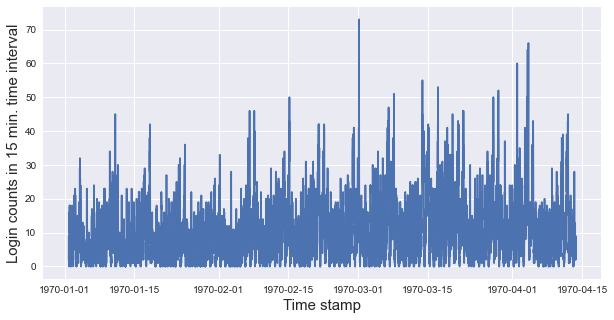

In [84]:
plt.figure(figsize=(10,5))
_=plt.plot(log_df)
plt.xlabel('Time stamp',fontsize=15)
plt.ylabel('Login counts in 15 min. time interval', fontsize=15)
plt.show()

In [85]:
log_df.reset_index(drop=False, inplace=True)
log_df['month']= pd.to_datetime(log_df['login_time'],errors= 'coerce').dt.month

In [86]:
log_df.columns

Index(['login_time', 'count', 'month'], dtype='object')

In [88]:
jan_df = log_df[log_df['month']==1]
feb_df = log_df[log_df['month']==2]
mar_df = log_df[log_df['month']==3]
apr_df = log_df[log_df['month']==4]

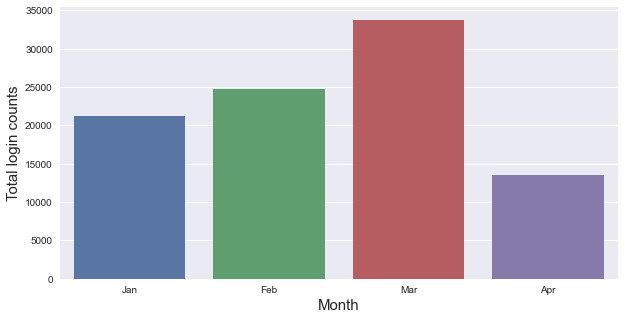

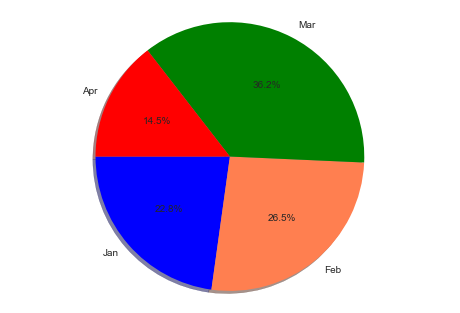

In [89]:
#Total login counts:

jc=jan_df['count'].sum()
fc = feb_df['count'].sum()
mc= mar_df['count'].sum()
ac=apr_df['count'].sum()


plt.figure(figsize=(10,5))
x=['Jan','Feb','Mar','Apr']
y=[jc,fc,mc,ac]
_=sns.barplot(x,y)
plt.xlabel('Month',fontsize=15)
plt.ylabel('Total login counts',fontsize=15)

plt.show()

#Pieplot:
labels = x
sizes = y
colors = ('b','coral','g','r')
explode = (0.00, 0,0,0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
#plt.savefig("5a.png")
plt.show()

In [90]:
jan_df['dayofweek']= pd.to_datetime(jan_df['login_time'],errors= 'coerce').dt.dayofweek
feb_df['dayofweek']= pd.to_datetime(feb_df['login_time'],errors= 'coerce').dt.dayofweek
mar_df['dayofweek']= pd.to_datetime(mar_df['login_time'],errors= 'coerce').dt.dayofweek
apr_df['dayofweek']= pd.to_datetime(apr_df['login_time'],errors= 'coerce').dt.dayofweek
jan_df.head()

C:\Users\Soumyadip\AppData\Local\Temp\ipykernel_12844\3967087091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jan_df['dayofweek']= pd.to_datetime(jan_df['login_time'],errors= 'coerce').dt.dayofweek
C:\Users\Soumyadip\AppData\Local\Temp\ipykernel_12844\3967087091.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feb_df['dayofweek']= pd.to_datetime(feb_df['login_time'],errors= 'coerce').dt.dayofweek
C:\Users\Soumyadip\AppData\Local\Temp\ipykernel_12844\3967087091.py:3: SettingWithCopyWarning: 
A valu

,login_time,count,month,dayofweek
0,1970-01-01 20:00:00,2,1,3
1,1970-01-01 20:15:00,6,1,3
2,1970-01-01 20:30:00,9,1,3
3,1970-01-01 20:45:00,7,1,3
4,1970-01-01 21:00:00,1,1,3


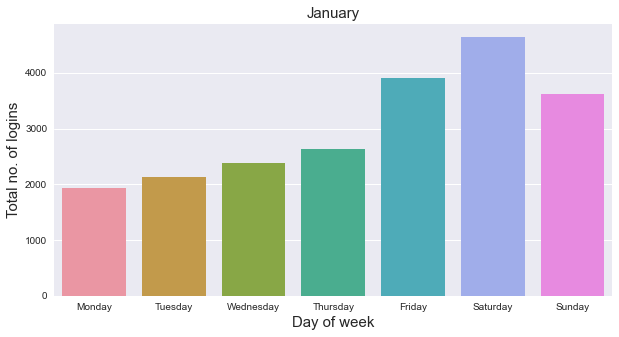

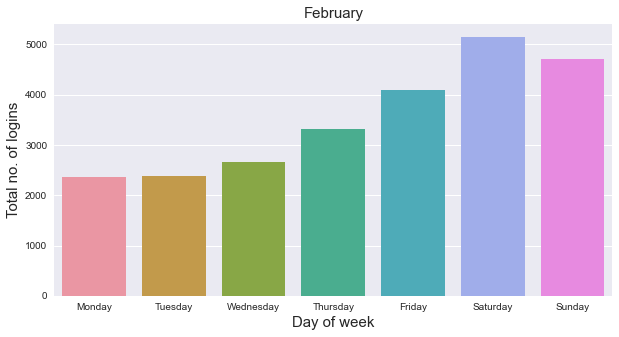

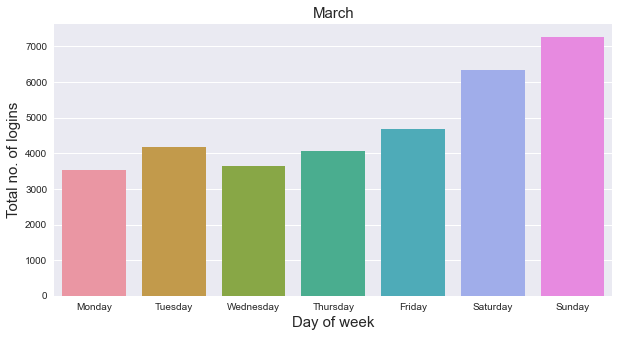

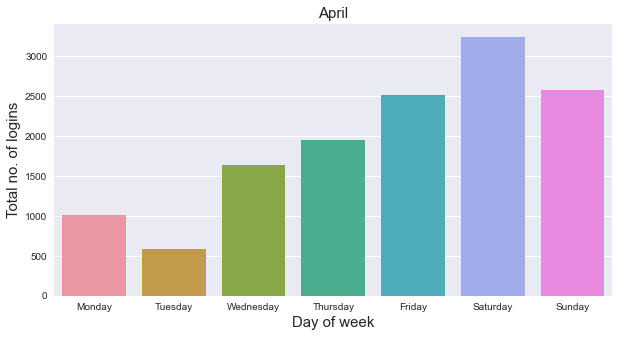

In [91]:
jan_day_count=jan_df.groupby('dayofweek')['count'].sum()
feb_day_count=feb_df.groupby('dayofweek')['count'].sum()
mar_day_count=mar_df.groupby('dayofweek')['count'].sum()
apr_day_count=apr_df.groupby('dayofweek')['count'].sum()


plt.figure(figsize=(10,5))
_=sns.barplot(jan_day_count.index,jan_day_count.values)
plt.xticks([0, 1, 2,3,4,5,6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.xlabel('Day of week',fontsize=15)
plt.ylabel('Total no. of logins',fontsize=15)
plt.title('January',fontsize=15)
plt.show()



plt.figure(figsize=(10,5))
_=sns.barplot(feb_day_count.index,feb_day_count.values)
plt.xticks([0, 1, 2,3,4,5,6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.xlabel('Day of week',fontsize=15)
plt.ylabel('Total no. of logins',fontsize=15)
plt.title('February',fontsize=15)
plt.show()


plt.figure(figsize=(10,5))
_=sns.barplot(mar_day_count.index,mar_day_count.values)
plt.xticks([0, 1, 2,3,4,5,6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.xlabel('Day of week',fontsize=15)
plt.ylabel('Total no. of logins',fontsize=15)
plt.title('March',fontsize=15)
plt.show()

plt.figure(figsize=(10,5))
_=sns.barplot(apr_day_count.index,apr_day_count.values)
plt.xticks([0, 1, 2,3,4,5,6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.xlabel('Day of week',fontsize=15)
plt.ylabel('Total no. of logins',fontsize=15)
plt.title('April',fontsize=15)
plt.show()

The data has two major trends.
1. The activity generally peaks approximately every 12 hours (early morning and early afternoon).
2. The activity generally builds over the course of the week, peaking on the weekend. Although this trend weakens in March, weekends can still be counted on to be busy (other days saw increased activity as well).



#### Part 2: Experiment and metrics design:

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric? Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on: how you will implement the experiment. what statistical test(s) you will conduct to verify the significance of the observation. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

**Answer**
1. Track drivers and find how much a driver spends in either city.
2. Inform drivers about the change in toll policy
3. Lesser wait times

The statistic that should be used here is the t-test to compare the average number of trips back and forth as well as trips in the non-weekday.

#### Part 3: Predictive modeling:

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained? 
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance. 
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).


In [92]:
with open('./ultimate_data_challenge.json') as f:
    data = json.load(f)

ultimate_df = pd.DataFrame(data)
ultimate_df.head()


,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [93]:
ultimate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [94]:
ultimate_df.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [96]:
ultimate_df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [97]:
ultimate_df[['last_trip_date','signup_date']].describe()

,last_trip_date,signup_date
count,50000,50000
unique,182,31
top,2014-06-29,2014-01-18
freq,2036,2948


In [98]:
ultimate_df['last_trip_date'][0]

'2014-06-17'

In [99]:
active_users = []
for i in range(len(ultimate_df)):
    st = pd.Timestamp(ultimate_df['signup_date'][i]) #get start date
    et = st + pd.Timedelta('181D') #6 months later
    at = et - pd.Timedelta('30D') #set point 30 days prior
    if at <= pd.Timestamp(ultimate_df['last_trip_date'][i]) <= et:
        active_users.append([1]) # now that the active condition has been met, set active user to 1
    else:
        active_users.append([0])

In [100]:
df1 = pd.DataFrame(active_users,columns = ['active_users'])

In [101]:
df1['active_users'].value_counts()

0    37802
1    12198
Name: active_users, dtype: int64

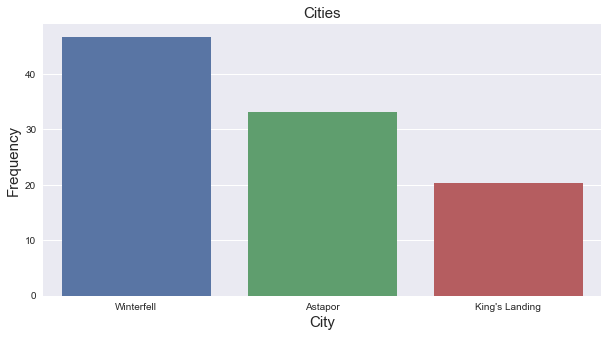

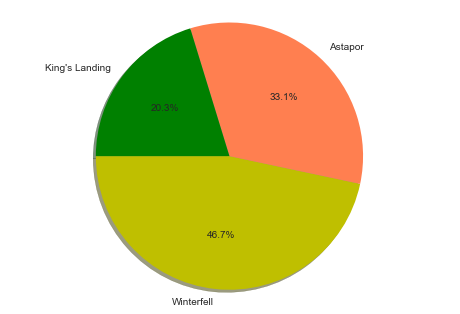

In [103]:
city=ultimate_df['city'].value_counts(normalize=True)

plt.figure(figsize=(10,5))
_=sns.barplot(city.index, city.values*100)
plt.xlabel('City',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Cities',fontsize=15)
plt.show()

labels = city.index
sizes = city.values
colors = ('y','coral','g')
explode = (0.00, 0,0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.show()


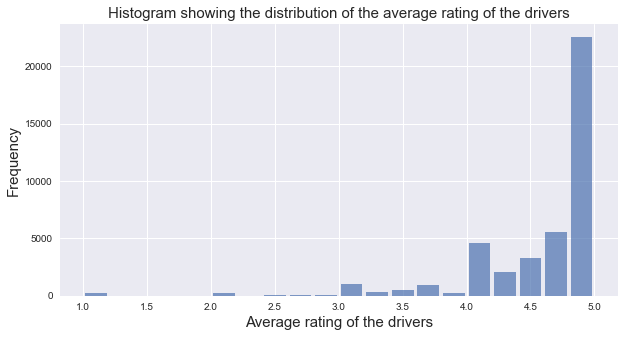

In [104]:
plt.figure(figsize=(10,5))
plt.hist(ultimate_df['avg_rating_of_driver'], bins=20,alpha=0.7, rwidth=0.85)
plt.xlabel('Average rating of the drivers',fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title ('Histogram showing the distribution of the average rating of the drivers',fontsize=15)
plt.show()

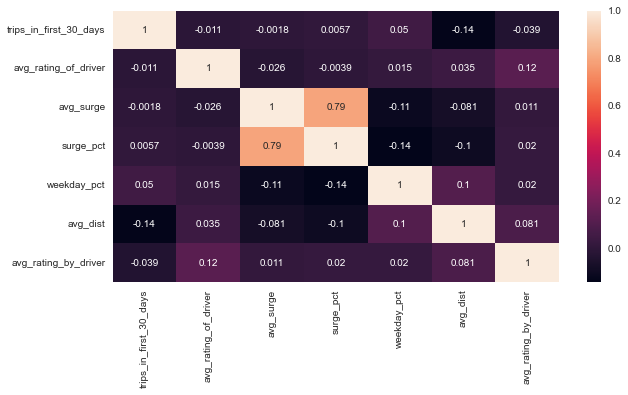

In [105]:
numerical = ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'weekday_pct'
            ,'avg_dist', 'avg_rating_by_driver']

plt.figure(figsize=(10,5))
corr = ultimate_df[numerical].corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values,annot=True)
plt.show()

In [106]:
df = pd.concat([ultimate_df, df1], axis = 1)

In [107]:
df.head(10)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_users
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0,0
6,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0,0
7,Winterfell,2,2014-01-28,5.0,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0,0
8,Winterfell,2,2014-01-21,4.5,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0,0
9,Winterfell,1,2014-01-03,NaN,1.00,2014-01-05,Android,0.0,False,0.0,2.37,5.0,0


In [108]:
# Table of ultimate balck vs active
ub_active = pd.crosstab(index=df["active_users"], 
                            columns=df["ultimate_black_user"],
                             margins=True)   # Include row and column totals

ub_active.columns = ["Not Ultimate Black","Is Ultimate Black","rowtotal"]
ub_active.index= ["Not Active","Is Active","coltotal"]

ub_active

,Not Ultimate Black,Is Ultimate Black,rowtotal
Not Active,25204,12598,37802
Is Active,5942,6256,12198
coltotal,31146,18854,50000


In [109]:
# Table of phone type vs active
phone_active = pd.crosstab(index=df["active_users"], 
                            columns=df["phone"],
                             margins=True)   # Include row and column totals

phone_active.columns = ["Android","iPhone","rowtotal"]
phone_active.index= ["Not Active","Is Active","coltotal"]

phone_active

,Android,iPhone,rowtotal
Not Active,13096,24394,37490
Is Active,1926,10188,12114
coltotal,15022,34582,49604


In [110]:
# Table of ultimate balck vs active
city_active = pd.crosstab(index=df["active_users"], 
                            columns=df["city"],
                             margins=True)   # Include row and column totals

city_active.columns = ["Astapor","King's Landing",'Winterfell',"rowtotal"]
city_active.index= ["Not Active","Is Active","coltotal"]

city_active

,Astapor,King's Landing,Winterfell,rowtotal
Not Active,13838,6099,17865,37802
Is Active,2696,4031,5471,12198
coltotal,16534,10130,23336,50000


In [111]:
#transforming categorical features into numerical for predictive modeling
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['Astapor',"King's Landing",'Winterfell'])
LE = preprocessing.LabelEncoder()
LE.fit(['iPhone','Android'])

LabelEncoder()

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
 12  active_users            50000 non-null  int64  
dtypes: bool(1), float64(6), int64(2), object(4)
memory usage: 4.6+ MB


In [113]:
df_drop = df.dropna()
df_drop['active_users'].value_counts()

0    30209
1    11236
Name: active_users, dtype: int64

The percentage of active users had a very minor change if dropped. The ratio of the active users also stay fairly consistent.

In [114]:
df = df.dropna()
df = df.reset_index(drop = True)

In [115]:
creation1 = le.transform(df['city']) #transform the categorical data into number labels
creation2 = LE.transform(df['phone'])

In [116]:
df2 = pd.DataFrame(creation1,columns = ['city#']) # add them to the dataframe
df3 = pd.DataFrame(creation2, columns = ['phone#'])
df = pd.concat([df,df2,df3],axis =1 )

In [117]:
df = df.drop(['city','phone'], axis=1)

In [118]:
UB = []
for i in range(len(df)):
    if df['ultimate_black_user'][i] == True:
        UB.append([1]) 
    else:
        UB.append([0])
df4 = pd.DataFrame(UB,columns = ['UB'])
df4.head()

,UB
0,1
1,0
2,0
3,1
4,0


In [119]:
df = pd.concat([df,df4],axis =1 )
df = df.drop(['ultimate_black_user'], axis=1) # no need for old columns
df.head() 

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,active_users,city#,phone#,UB
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,46.2,3.67,5.0,0,1,1,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,50.0,8.26,5.0,0,0,0,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,100.0,0.77,5.0,0,0,1,0
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,80.0,2.36,4.9,1,1,1,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,82.4,3.13,4.9,0,2,0,0


In [120]:
y = df['active_users']
X = df[['avg_dist', 'avg_rating_by_driver','trips_in_first_30_days', 'city#', 'phone#','UB']]

In [121]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11677   375]
 [ 3949   577]]
              precision    recall  f1-score   support

           0       0.75      0.97      0.84     12052
           1       0.61      0.13      0.21      4526

    accuracy                           0.74     16578
   macro avg       0.68      0.55      0.53     16578
weighted avg       0.71      0.74      0.67     16578



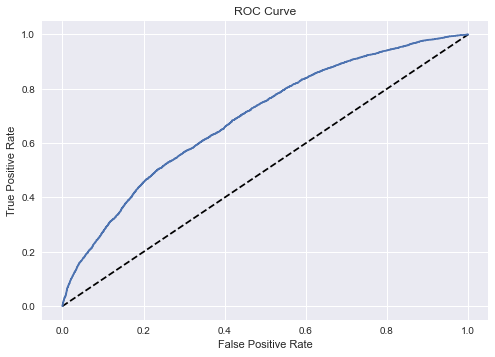

In [122]:
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [123]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv = 5,scoring = 'roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.6908361472798901
AUC scores computed using 5-fold cross-validation: [0.69648048 0.69118337 0.68945508 0.69698036 0.70472593]


In [124]:
# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 19306.977288832535}
Best score is 0.7426227530462057


In [126]:
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [127]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
# fit model to training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [129]:
features = X
importances = list(model.feature_importances_)
imp=np.sort(importances)
tab=pd.DataFrame(list(zip(X,imp)),columns =['Features', 'Importance scores']) 
print(tab)



                 Features  Importance scores
0                avg_dist           0.051860
1    avg_rating_by_driver           0.057067
2  trips_in_first_30_days           0.107864
3                   city#           0.172467
4                  phone#           0.297519
5                      UB           0.313223


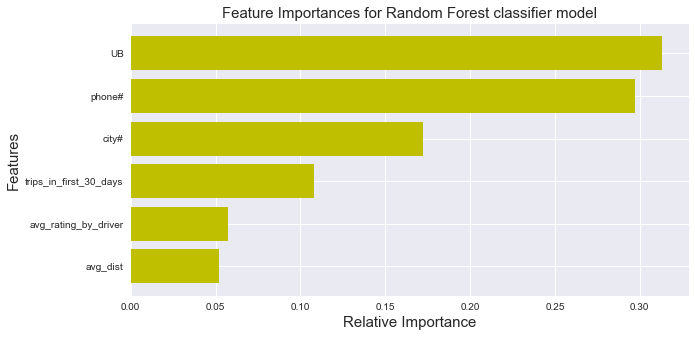

In [136]:
plt.figure(figsize=(10,5))
index = [0,1,2,3,4,5]
_=plt.barh(index,imp, align='center',color='y')
plt.xlabel('Relative Importance',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.yticks(index, features)
plt.title('Feature Importances for Random Forest classifier model',fontsize=15)
plt.show()

Text(0, 0.5, 'Feature Importance Score')

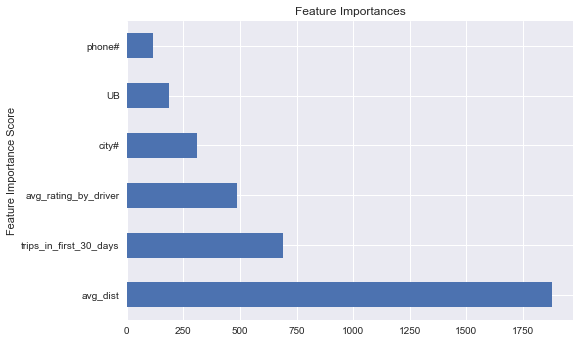

In [140]:
feat_imp = pd.Series(model.get_booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='barh', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [137]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.27%


**Conclusion**

First the logistic regression model was used as it is a good predictor for binary classification. XGboost was used post hyperparameter tuning. Astapor had the worst rate of users, so services should be improved. There are also better iPhone users than android users so android app should be improved too.